$$\Huge \text{Recurrent Neural Networks}$$
$$ \text{Binh Tran} $$

# Introduction

$\large{✔︎}$ How are **Google Translate**, **Apple Siri** work?

$\large{✔︎}$  In late 2016, Google introduced a new system behind their **Google Translate** which uses **state-of-the-art machine learning** techniques

So what do all the above have in common? They deal with **sequential data** to make predictions


___
**Support we want to recognize the cat**

* You can train a **feedforward neural network** (typically CNN-Convolutional Neural Network) using **multiple photos with and without cats.**

>___
>In this network, the **information moves in only one direction**, **forward**, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are **no cycles or loops** in the network. — [Wikipedia](https://en.wikipedia.org/wiki/Feedforward_neural_network)
>____

**These networks are used for pattern recognition and can be illustrated as follows:** 

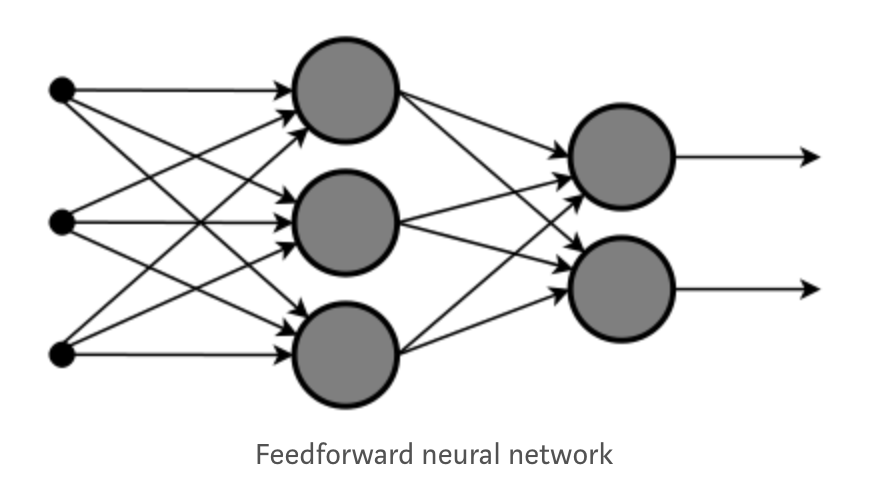

**In order to handle sequential data** successfully
* We need to use **recurrent (feedback)** neural network. It is able to: 

    * **‘memorize’ parts of the inputs** 
    * **use them to make accurate predictions**. 
       * These networks are at the heart of **speech recognition, translation and more.** 
       * **Recurrent neural network** is one of the most popular neural networks **for language modeling**(based on existed words to **predict next word**) or automatic input like the automatic complete in the mobile input(based on existed character to **predict next character**).

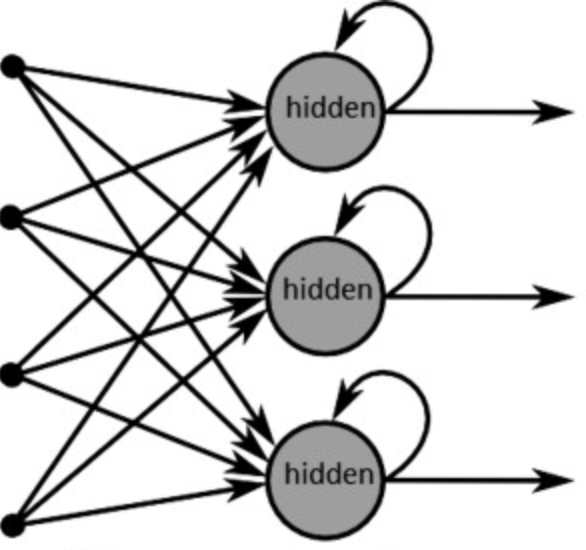

# Use RNNs For:

$\large{✔︎}$ Text data   
$\large{✔︎}$ Speech data   
$\large{✔︎}$ Classification prediction problems   
$\large{✔︎}$ Regression prediction problems   
$\large{✔︎}$ Generative models   

___ 
# Dive into a more detailed explanation.

## Build a RNN for language

   * **The training data** is a list of sentences. Each sentence is a series of words(tokenized words).
   * For **each sentence:**
       * From the **first word,** we will **predict the second word.**
       * From the **first and the second word,** we will **predict the third word,** etc. 

___
$\Large \mathbf {Recurrent ~ neural~ network~ means }$
$$\large \text {when it predict time order t, it will remember the information from time order 0 to time order t.}$$
___

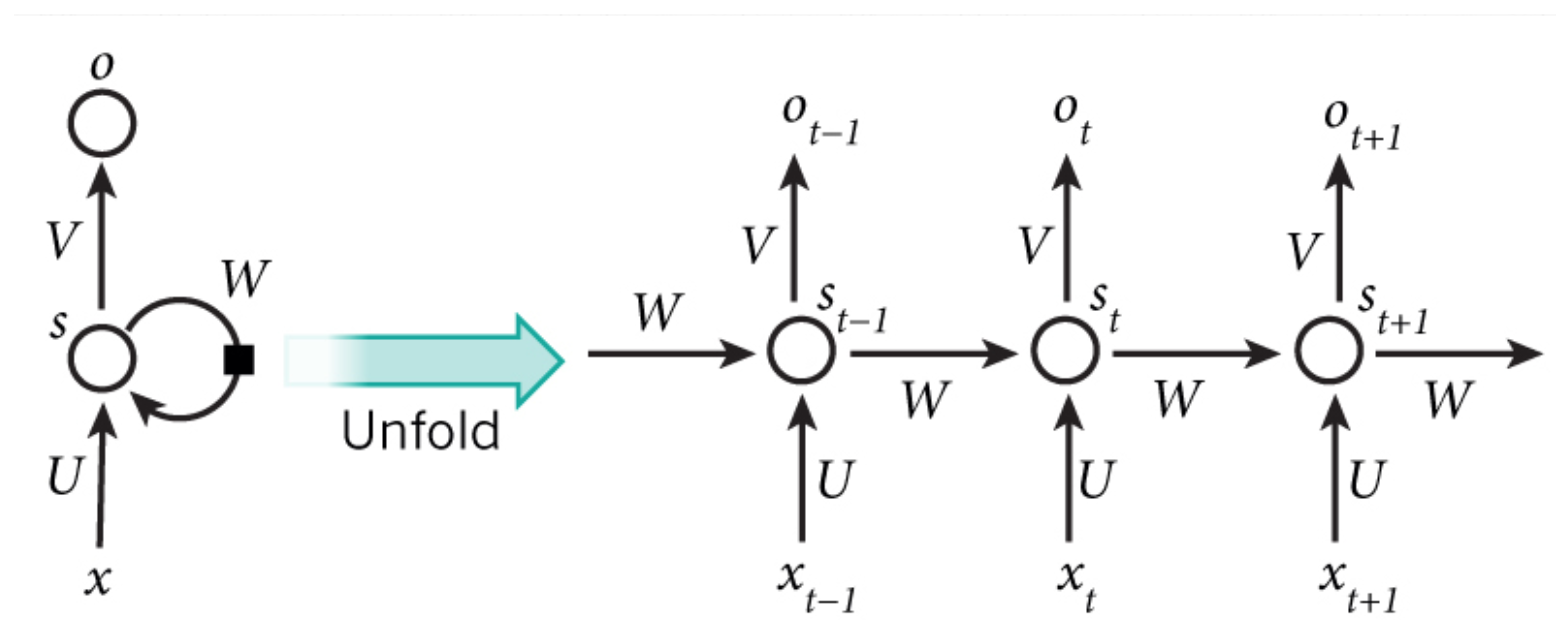

* We start from $x_0$ to status $s_0$
    * $s_0 = \tanh(Ux_0 + Ws_{-1})$, where $s_{−1}$ is the initialization of status initialized as $0$.
    * The output $o_0 = \mathrm{softmax}(Vs_0)$
* Then when we go to next word $x_1$ we will have updated status 
    * $s_1 = \tanh(Ux_1 + Ws_0)$
    * output $o_1 = \mathrm{softmax}(Vs_1)$

> We will see at time order $t=1$ it **not only depends on input $x_1$ but also depends on the previous status $s_0$.** 


$\Large ∗$ **The equation for the RNN used is:**

___
$$
\begin{aligned}
s_t &= \tanh(Ux_t + Ws_{t-1}) \\
o_t &= \mathrm{softmax}(Vs_t)
\end{aligned}
$$
___

If we plot the logic of RNN and the corresponding forward propagation, it is like 

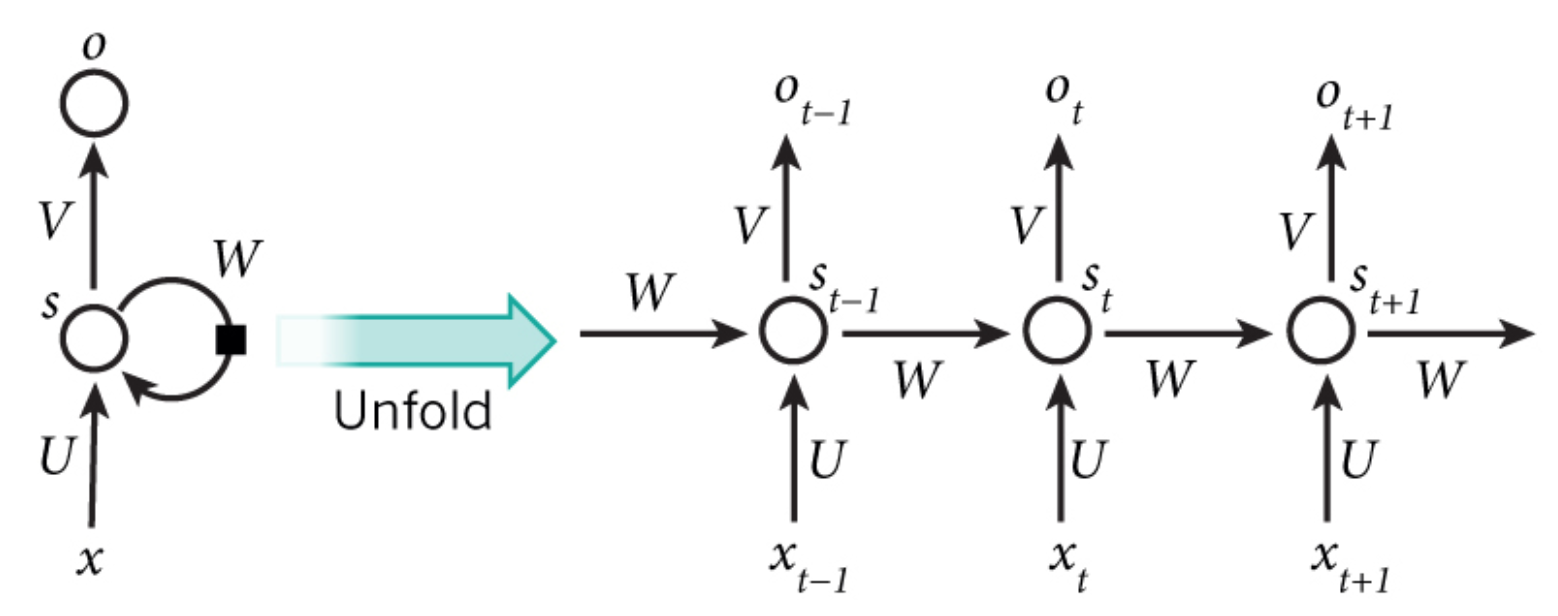

# Building your Recurrent Neural Network - Step by Step

$\large * $**The training data**

___
* **79,170 sentences** coming **from 15,000 reddit comments**(one comment may has multiple sentences).
* The **vocabulary** consists of the **8,000 most common words**. 
* For the **words not included** in the vocabulary list are **replaced by UNKNOWN_TOKEN.**
* Data from: [google bigquery](https://bigquery.cloud.google.com/table/fh-bigquery:reddit_comments.2015_08)
___

In [1]:
# %load /app/00_Libs/display.py
import pandas as pd
from IPython.display import display, Markdown, Latex, HTML
# display(Markdown('*some markdown* $\phi$'))
# # If you particularly want to display maths, this is more direct:
# display(Latex('$\phi$'))

def display_markdown(str):
    display(Markdown(str))

def display_latex(str):
    display(Latex(str))

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display(HTML(html_str.replace('table','table style="display:inline"')))
#display_markdown('*some markdown* $\phi$')
#display_latex('$\phi$')

## Import libs

In [2]:
import csv
import numpy as np
import nltk 
import itertools 

# uncomment if punkt have not downloaded yet
# nltk.download('punkt')

## Build diectionay

In [3]:
vocabulary_size = 8000
unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

## Read the data and append SENTENCE_START and SENTENCE_END tokens

In [4]:
display_markdown("*** Reading CSV file...**")
with open('data/reddit-comments-2015-08.csv', 'rt', encoding='utf8') as f:
    reader = csv.reader(f, skipinitialspace=True)
    next(reader)
    # Split full comments into sentences
    sentences = itertools.chain(*[nltk.sent_tokenize(x[0].lower()) for x in reader])
    # Append SENTENCE_START and SENTENCE_END
    sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]
display_markdown("- Parsed **%d** sentences." % (len(sentences)))
display_markdown("*** Finished reading CSV file**")  

*** Reading CSV file...**

- Parsed **79170** sentences.

*** Finished reading CSV file**

### Show the first sentence

In [6]:
sentences[0]

"SENTENCE_START i joined a new league this year and they have different scoring rules than i'm used to. SENTENCE_END"

### Tokenize the sentences into words

In [7]:
display_markdown("*** Tokenizing...**")
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]
display_markdown("*** Fnish...**")

*** Tokenizing...**

*** Fnish...**

### show fist sentense

In [8]:
pd.set_option('display.max_columns', None)
pd.DataFrame([np.asarray(tokenized_sentences[0]).T] )

0  1       2  3    4       5     6     7    8     9    10  \
0  SENTENCE_START  i  joined  a  new  league  this  year  and  they  have   

          11       12     13    14 15  16    17  18 19            20  
0  different  scoring  rules  than  i  'm  used  to  .  SENTENCE_END

### Count the word frequencies


In [9]:
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
display_markdown("> * Found **%d** unique words tokens." % len(list(word_freq.items())))

> * Found **65408** unique words tokens.

## Building vocabulary

In [10]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
pd.DataFrame(vocab[:10])

0      1
0  SENTENCE_START  79170
1    SENTENCE_END  79170
2               .  67457
3             the  52345
4               ,  52137
5              to  35569
6               i  32161
7               a  31752
8             and  30009
9              of  23226

### Work to index and Index to word

In [11]:
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
display_markdown("* Using vocabulary size **%d**." % vocabulary_size)
display_markdown("* The least frequent word in our vocabulary is **'%s'** and appeared **%d** times." % (vocab[-1][0], vocab[-1][1]))

* Using vocabulary size **8000**.

* The least frequent word in our vocabulary is **'documentary'** and appeared **10** times.

### Replace all words not in our vocabulary with the unknown token

In [12]:
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]

display_markdown("\n* Example sentence: **'%s'**" % sentences[0])
display_markdown("\n* Example sentence after Pre-processing: **'%s'**" % tokenized_sentences[0])


* Example sentence: **'SENTENCE_START i joined a new league this year and they have different scoring rules than i'm used to. SENTENCE_END'**


* Example sentence after Pre-processing: **'['SENTENCE_START', 'i', 'joined', 'a', 'new', 'league', 'this', 'year', 'and', 'they', 'have', 'different', 'scoring', 'rules', 'than', 'i', "'m", 'used', 'to', '.', 'SENTENCE_END']'**

# Create the training data

In [13]:
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences])

In [14]:
index = 3
display(pd.DataFrame([X_train[index]]))
display(Markdown('$\Rightarrow$'))
display(pd.DataFrame([y_train[index]]))

0   1    2   3  4   5   6     7    8   9    10  11  12    13   14  15   16  \
0  0  36  266  13  4  13  11  6303  600  12  3024  74   3  1664  977  15  597   

   17  
0  34

$\Rightarrow$

0    1   2  3   4   5     6    7   8     9  10  11    12   13  14   15  \
0  36  266  13  4  13  11  6303  600  12  3024  74   3  1664  977  15  597   

   16  17  
0  34   1

In [15]:
def display_sentence(indexs, pandas= True):
    x = [index_to_word[x] for x in indexs]
    if pandas:
        display(pd.DataFrame([x]))
    else:
        print(' '.join(x))
    

In [16]:
display_sentence(X_train[index], False)

SENTENCE_START my question is , is it wildly clear that qb has the highest potential for points ?


In [17]:
display_sentence(X_train[index])
display(Markdown('$\Rightarrow$'))
display_sentence( y_train[index])

0   1         2   3  4   5   6       7      8     9  10   11  \
0  SENTENCE_START  my  question  is  ,  is  it  wildly  clear  that  qb  has   

    12       13         14   15      16 17  
0  the  highest  potential  for  points  ?

$\Rightarrow$

0         1   2  3   4   5       6      7     8   9   10   11       12  \
0  my  question  is  ,  is  it  wildly  clear  that  qb  has  the  highest   

          13   14      15 16            17  
0  potential  for  points  ?  SENTENCE_END

 ## Build RNN

### Model and Data Structure, Initialization

**The model structure of RNN used here is**

\begin{aligned}
s_t &= \tanh(Ux_t + Ws_{t-1}) \\
o_t &= \mathrm{softmax}(Vs_t)
\end{aligned}

The vocabulary size $\mathbf{C=8,000}$   
The hidden layer size $\mathbf{H=100}$    
So the size of $\mathbf {\text{ W is 100×100}}$

The dimension of all the data used is (below $x_t$ is **index position in the vocabulary list** for the $t_{th}$ word in the sentence, and **$x$ is a sentence with** $l$ **words**):

\begin{aligned}
x_t &\in \mathbb{R}^{8000}  \Longleftrightarrow x \in \mathbb{R}^{l \times 8000} \\
o_t &\in \mathbb{R}^{8000}  \Longleftrightarrow o \in \mathbb{R}^{l \times 8000} \\
s_t &\in \mathbb{R}^{100}   \Longleftrightarrow s \in \mathbb{R}^{l \times 100} \\
U &\in \mathbb{R}^{100 \times 8000} \\
V &\in \mathbb{R}^{8000 \times 100} \\
W &\in \mathbb{R}^{100 \times 100} \\
\end{aligned}

**The initizalition of the parameters is initialized as from random uniform distribution** $U\left(-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}} \right)$ :

$\Large 1.0 $ **Initialization**
___

In [18]:
class RNNNumpy:
    # word_dim: len of vocabulary
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
#         print(self.U.shape)
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        

$\Large 1.1$**Forward Propagation**
___

For a given sentence $x=(x_0,⋯,x_{T−1})$ having $T$ words,    
    we will start from $x_0$ with initialized $s_{−1}=0$ to calculate $s_0$ and $o_0$, then from $s_0$ together with $x_1$ to get $s_1$ and $o_1$, and so on.

**Note:**
> - Each sentence **can have differ lenght from others**
> - When feed-forward
>    + when do feed-forward for each word of the sentent
     + The state of pre-word will be inputed to the current word of forwarding
     + Each word is onehoted


In [19]:
# 1. forward propagation

def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

def forward_propagation(self, x):
    # total num of time steps, len of vector x
    T = len(x)
    # during forward propagation, save all hidden stages in s, S_t = U .dot x_t + W .dot s_{t-1}
    # we also need the initial state of s, which is set to 0
    # each time step is saved in one row in s，each row in s is s[t] which corresponding to an rnn internal loop time
    s = np.zeros((T+1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)
    # output at each time step saved as o, save them for later use
    o = np.zeros((T, self.word_dim))
    for t in np.arange(T):
        # we are indexing U by x[t]. it is the same as multiplying U with a one-hot vector
        s[t] = np.tanh(self.U[:, x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s]

RNNNumpy.forward_propagation = forward_propagation

**Predict**
___

Each $o_t$ here is a vector of prob representing the word in the vocabulary list.    
All **we want is the next word with the predicted prob**, we call it predict

In [20]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)
 
RNNNumpy.predict = predict

In [21]:
len(X_train[0])

20

In [22]:
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
display(pd.DataFrame([X_train[0]]))
o, s = model.forward_propagation(X_train[0])
o.shape
# pd.DataFrame([o[0]])

0  1     2  3    4    5   6    7  8   9  10   11    12   13  14  15  16  \
0  0  6  3495  7  155  796  25  222  8  32  20  202  4955  350  91   6  66   

    17  18  19  
0  207   5   2

(20, 8000)

In [23]:
model.predict(X_train[0])

array([1284, 7532, 7652, 4936, 4073, 5781, 6771, 5516,  829, 2894, 6422,
       3298, 3410, 1715, 6876, 7316, 2993, 4184, 5883, 5843])

In [24]:
pd.DataFrame([[index_to_word[index] for index in X_train[1]]])

0   1   2  3       4    5              6              7    8  \
0  SENTENCE_START  it  's  a  slight  ppr  UNKNOWN_TOKEN  UNKNOWN_TOKEN  ppr   

   9  
0  .

In [25]:
pd.DataFrame([[index_to_word[index] for index in model.predict(X_train[1])]])

0   1       2      3       4     5        6    7       8     9
0  north  9.  doubts  bitch  austin  stay  enforce  odd  polish  ^^^a

$\Large 1.2$ **Lost Function**
___

We will use **cross entropy** loss function here
* If we have $N$ training examples (words in the text) and $C$ classes (the size of the vocabulary list), then the **lost function** with respect to the **prediction** $o$ and the true **lable** $y$ is:

\begin{aligned}
L(y, o) = - \frac{1}{N}\sum_{n \in N}y_n \log o_n
\end{aligned} 

* If everything is predicted correctly, that is: 
    * For the $y_i=1$, the corresponding $o_i=1$, then $1 \times \log(1) = 1 \times 0 = 0$. 
    * For the rest $y_i=0$, the multiplied value $0 \times \log(o_i) = 0$. So the loss will be $0$ for the perfect function.

* On the other way, if the model have no prediction power, then 
    * all $o_i=1/C$ then we will have $L(y, o) = - \frac{1}{N}\sum_{n \in N} \log \frac{1}{C} = \log(C)$

In [65]:
## 2. calculate the loss
'''
the loss is defined as
L(y, o) = -\frac{1}{N} \sum_{n \in N} y_n log(o_n)
'''
def calculate_total_loss(self, x, y):
    L = 0
    # for each sentence ...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # we only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L

def calculate_loss(self, x, y):
    # divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x, y)/N

RNNNumpy.calculate_total_loss = calculate_total_loss
RNNNumpy.calculate_loss = calculate_loss

print("Expected Loss for random prediction: %f" % np.log(vocabulary_size))
print("Actual loss: %f" % model.calculate_loss(X_train[:1000], y_train[:1000]))

Expected Loss for random prediction: 8.987197


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Actual loss: 6.608196


$\Large 1.3$ **Model Training with Backward-Propagation**

* **We need to find the value of $U,V,W$ to minimize the loss function.**
* SGD is the common way to do this. 
* Now we need to calculate $\frac{\partial{L}}{\partial{U}}, \frac{\partial{L}}{\partial{V}}, \frac{\partial{L}}{\partial{W}}$

___
> In **RNN** it is a little more complicated because of the **hidden status which links the current time step with the historical time step.**  

> So we need to calculate the **gradients through the time**. Thus we call this algorithm **backpropagation through time (BPTT).**

___

The parameters are **shared in all the time steps**, the **gradients at each output** will not only **depends on the current time step**, but also the **previous time steps.**

$\Large *$ Let's look at the graph of RNN below. **Suppose** now we are at time **step $t=3$**, we want to calculate the gradients.

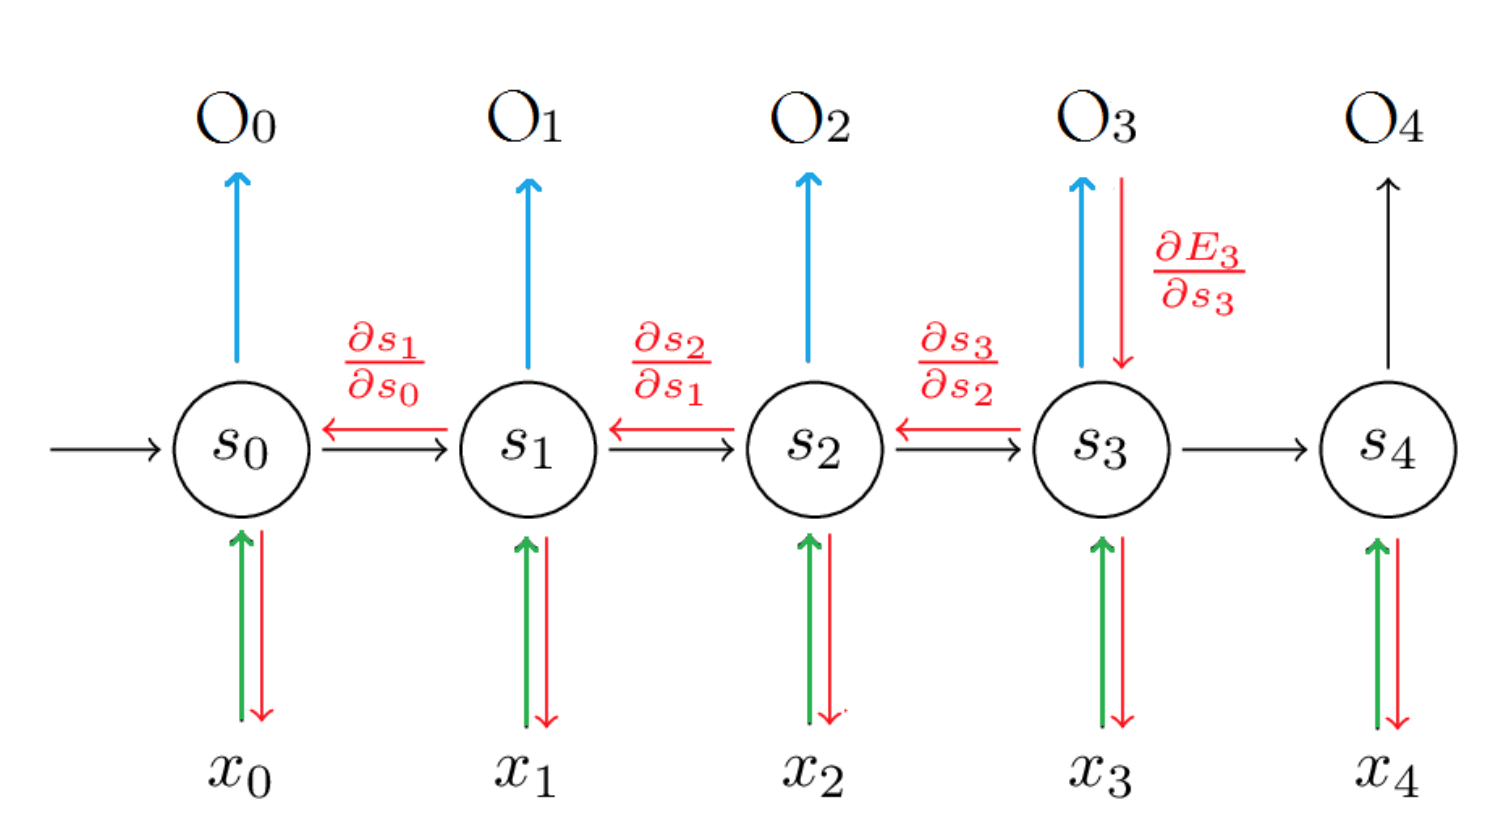

* To make it clear, I will write the forward propagation explitly:

\begin{aligned}
& s_0 = tanh(U x_0 + W s_{-1}) \\
& z_0 = V s_0   \\
& o_0 \triangleq \hat{y}_{0} = sigmoid(z_0) \\\\
& s_1 = tanh(U x_1 + W s_0) \\
& z_1 = V s_1   \\
& o_1 \triangleq \hat{y}_{1} = sigmoid(z_1) \\\\
& s_2 = tanh(U x_2 + W s_1) \\
& z_2 = V s_2   \\
& o_2 \triangleq \hat{y}_{2} = sigmoid(z_2) \\\\
& s_3 = tanh(U x_3 + W s_2) \\
& z_3 = V s_3   \\
& o_3 \triangleq \hat{y}_{3} = sigmoid(z_3) \\
\end{aligned}

**First, let's denote**

\begin{aligned}
& d_3 \triangleq \big(\hat{y}_3 - y_3 \big) \cdot V \cdot \big(1 - s_3 ^ 2 \big) \\
& d_2 \triangleq d_3 \cdot W \cdot \big(1 - s_2 ^ 2 \big) \\
& d_1 \triangleq d_2 \cdot W \cdot \big(1 - s_1 ^ 2 \big) \\
& d_0 \triangleq d_1 \cdot W \cdot \big(1 - s_0 ^ 2 \big) \\
\end{aligned}

$\Large 1.3.1$ **Calculate of partial derivative of error** $E3$ to $U$: $\frac{\partial{L}}{\partial{U}}$

We have already know each historical hidden status will be used to calculate current status. The parameters are used in each status. 

So we need to calculate all the hidden status to the parameter $U$.

Note: $tanh(u)^1$

\begin{aligned}
\frac{\partial{s_0}}{\partial{U}} &= \big(1 - s_0 ^ 2 \big) \left(x_0 + W \cdot  \frac{\partial{s_{-1}}}{\partial{U}} \right) \\
&= \big(1 - s_0 ^ 2 \big) \cdot x_0 \\\\
\frac{\partial{s_1}}{\partial{U}} &= \big(1 - s_1 ^ 2 \big) \left(x_1 + W \cdot \frac{\partial{s_{0}}}{\partial{U}} \right) \\
&= \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \\\\
\frac{\partial{s_2}}{\partial{U}} &= \big(1 - s_2 ^ 2 \big) \left(x_2 + W \cdot \frac{\partial{s_{1}}}{\partial{U}} \right) \\
&= \big(1 - s_2 ^ 2 \big) \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \Big)\\\\
\frac{\partial{s_3}}{\partial{U}} &= \big(1 - s_3 ^ 2 \big) \left(x_3 + W \cdot \frac{\partial{s_{2}}}{\partial{U}} \right) \\
&= \big(1 - s_3 ^ 2 \big) \\
& \bigg(x_3 + W \cdot \big(1 - s_2 ^ 2 \big) \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \Big)  \bigg)\\\\
\end{aligned}

$\Large * $ **After we get this, we can calculate the partial derivative of error $E_3$ to $U$:**



\begin{aligned}
\frac{\partial{E_3}}{\partial{U}} &= \frac{\partial{E_3}}{\partial{\hat{y}_3}} \frac{\partial{\hat{y}_3}}{\partial{z_3}} \frac{\partial{z_3}}{\partial{s_3}} \frac{\partial{s_3}}{\partial{U}}  \\
&= \left(\frac{\partial{E_3}}{\partial{\hat{y}_3}} \frac{\partial{\hat{y}_3}}{\partial{z_3}} \right) \cdot \frac{\partial{z_3}}{\partial{s_3}} \cdot \frac{\partial{s_3}}{\partial{U}}  \\
&= \big(\hat{y}_3 - y_3 \big) \cdot V \cdot \frac{\partial{s_3}}{\partial{U}}  \\
&= \big(\hat{y}_3 - y_3 \big) \cdot V \cdot \big(1 - s_3 ^ 2 \big) \bigg(x_3 + W \cdot \big(1 - s_2 ^ 2 \big) \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \Big)  \bigg)\\
& \triangleq d_3 \big[x_3 + W \cdot  \big(1 - s_2 ^ 2 \big) \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \Big)   \big]\\
&= d_3 x_3 + d_3 W \cdot \big(1 - s_2 ^ 2 \big) \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \Big) \\
& \triangleq d_3 x_3 + d_2 \Big(x_2 + W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big)\Big) \\
&= d_3 x_3 + d_2 x_2 + d_2 W \cdot \big(1 - s_1 ^ 2 \big) \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \\
& \triangleq d_3 x_3 + d_2 x_2 + d_1 \big(x_1 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0 \big) \\
&= d_3 x_3 + d_2 x_2 + d_1 x_1 + d_1 W \cdot \big(1 - s_0 ^ 2 \big) \cdot x_0  \\
& \triangleq d_3 x_3 + d_2 x_2 + d_1 x_1 + d_0 \cdot x_0  \\
\end{aligned}

$\Large 1.3.2$ **Calculate of partial derivative of error $E_3$ to $W$: $\frac{\partial{L}}{\partial{W}}$**

**First is each hidden status to $W$:**

\begin{aligned}
\frac{\partial{s_0}}{\partial{W}} &= \big(1 - s_0 ^ 2 \big) \left(s_{-1} + \frac{\partial{s_{-1}}}{\partial{W}} \right) \\
&= \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \\\\
\frac{\partial{s_1}}{\partial{W}} &= \big(1 - s_1 ^ 2 \big) \left(s_0 + W \cdot \frac{\partial{s_{0}}}{\partial{W}} \right) \\
&= \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \\\\
\frac{\partial{s_2}}{\partial{W}} &= \big(1 - s_2 ^ 2 \big) \left(s_1 + W \cdot \frac{\partial{s_{1}}}{\partial{W}} \right) \\
&= \big(1 - s_2 ^ 2 \big) \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big)\\\\
\frac{\partial{s_3}}{\partial{W}} &= \big(1 - s_3 ^ 2 \big) \left(s_2 + W \cdot \frac{\partial{s_{2}}}{\partial{W}} \right) \\
&= \big(1 - s_3 ^ 2 \big) \bigg(s_2 + W \cdot \big(1 - s_2 ^ 2 \big) \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big)  \bigg)\\\\
\end{aligned}

**Then we can write the partial derivative of error $E_3$ to $W$:**

\begin{aligned}
\frac{\partial{E_3}}{\partial{W}} &= \frac{\partial{E_3}}{\partial{\hat{y}_3}} \frac{\partial{\hat{y}_3}}{\partial{z_3}} \frac{\partial{z_3}}{\partial{s_3}} \frac{\partial{s_3}}{\partial{W}}  \\
&= \left(\frac{\partial{E_3}}{\partial{\hat{y}_3}} \frac{\partial{\hat{y}_3}}{\partial{z_3}} \right) \cdot \frac{\partial{z_3}}{\partial{s_3}} \cdot \frac{\partial{s_3}}{\partial{W}}  \\
&= \big(\hat{y}_3 - y_3 \big) \cdot V \cdot \frac{\partial{s_3}}{\partial{W}}  \\
&= \big(\hat{y}_3 - y_3 \big) \cdot V \cdot \big(1 - s_3 ^ 2 \big) \bigg(s_2 + W \cdot \big(1 - s_2 ^ 2 \big) \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big)  \bigg)\\
& \triangleq d_3    \bigg(s_2 + W \cdot \big(1 - s_2 ^ 2 \big) \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big)  \bigg)   \\
&= d_3 s_2 + d_3 W \cdot \big(1 - s_2 ^ 2 \big) \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big) \\
& \triangleq d_3 s_2 + d_2 \Big(s_1 + W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \Big) \\
&= d_3 s_2 + d_2 s_1 + d_2 W \cdot \big(1 - s_1 ^ 2 \big) \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \\
& \triangleq d_3 s_2 + d_2 s_1 + d_1 \big(s_0 + W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1} \big) \\
&= d_3 s_2 + d_2 s_1 + d_1 s_0 + d_1 W \cdot \big(1 - s_0 ^ 2 \big) \cdot s_{-1}  \\
& \triangleq d_3 s_2 + d_2 s_1 + d_1 s_0 + d_0 \cdot s_{-1}  \\
\end{aligned}

$\Large 1.3.3$ **Calculate of partial derivative of error** $E_3$ to $V$: $\frac{\partial{L}}{\partial{V}}$

**This will be easier than the two above:**

\begin{aligned}
\frac{\partial{E_3}}{\partial{V}} &= \frac{\partial{E_3}}{\partial{\hat{y}_3}} \frac{\partial{\hat{y}_3}}{\partial{z_3}} \frac{\partial{z_3}}{\partial{V}} \\
&= (\hat{y}_{3} - y_3)  s_3
\end{aligned}

**From the derivatives formula above, we can easily write the BPTT in python:**

In [66]:
## 3. BPTT
'''
1. we nudge the parameters into a direction that reduces the error. the direction is given by the gradient of the loss: \frac{\partial L}{\partial U}, 
\frac{\partial L}{\partial V}, \frac{\partial L}{\partial W}
2. we also need learning rate: which indicated how big of a step we want to make in each direction
Q: how to optimize SGD using batching, parallelism and adaptive learning rates.

RNN BPTT: because the parameters are shared by all time steps in the network, the gradient at each output depends not only on the calculations of the
current time step, but also the previous time steps.
'''

def bptt(self, x, y):
    T = len(y)
    # perform forward propagation
    o, s = self.forward_propagation(x)
    # we will accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1   # it is y_hat - y
    # for each output backwards ...
    for t in np.arange(T):
        dLdV += np.outer(delta_o[t], s[t].T)    # at time step t, shape is word_dim * hidden_dim
        # initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # backpropagation through time (for at most self.bptt_truncate steps)
        # given time step t, go back from time step t, to t-1, t-2, ...
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print("Backprogation step t=%d bptt step=%d" %(t, bptt_step))
            dLdW += np.outer(delta_t, s[bptt_step - 1])
            dLdU[:, x[bptt_step]] += delta_t
            # update delta for next step
            dleta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1]**2)
    return [dLdU, dLdV, dLdW]

RNNNumpy.bptt = bptt

When we implement the backpropagaton it is good idea to also implement gradient checking. The idad behind gradient checking is that derivative of a parameter is equal to the slope at that point, which we can approximate by slighyly changing the parameter and then dividing by the change:

\begin{aligned}
\frac{\partial{L}}{\partial{\theta}} = \lim_{h \rightarrow 0} \frac{L(\theta + h) - L(\theta - h)}{2h}
\end{aligned}

**gradient checking**
___

In [67]:
### 3.1 gradient checking
'''
verify the gradient by its definition:
\frac{\partial{L}}{\partial{\theta}} = \lim_{h \propto 0} \frac{J(\theta + h) - J(\theta - h)}{2h}
'''
import operator
def gradient_check(self, x, y, h = 0.001, error_threshold = 0.01):
    # calculate the gradient using backpropagation
    bptt_gradients = self.bptt(x, y)
    # list of all params we want to check
    model_parameters = ["U", "V", "W"]
    # gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # get the actual parameter value from model, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print("performing gradient check for parameter %s with size %d. " %(pname, np.prod(parameter.shape)))
        # iterate over each element of the parameter matrix, e.g. (0,0), (0,1)...
        it = np.nditer(parameter, flags = ['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # save the original value so we can reset it later
            original_value = parameter[ix]
            # estimate the gradient using (f(x+h) - f(x-h))/2h
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x], [y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x], [y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # reset parameter to the original value
            parameter[ix] = original_value
            # the gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate the relative error (|x - y|)/(|x|+|y|)
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # if the error is too large fail the gradient check
            if relative_error < error_threshold:
                print("Gradient check error: parameter = %s ix = %s" %(pname, ix))
                print("+h Loss: %f" % gradplus)
                print("-h Loss: %f" % gradminus)
                print("Estimated gradient: %f" % estimated_gradient)
                print("Backpropagation gradient: %f" % backprop_gradient)
                print("Relative error: %f" % relative_error)
                return
            it.iternext()
        print("Gradient check for parameter %s passed. " %(pname))

RNNNumpy.gradient_check = gradient_check

grad_check_vocab_size = 100
np.random.seed(10)
model = RNNNumpy(grad_check_vocab_size, 10, bptt_truncate = 1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

performing gradient check for parameter U with size 1000. 
Gradient check error: parameter = U ix = (0, 3)
+h Loss: 18.307080
-h Loss: 18.307296
Estimated gradient: -0.108091
Backpropagation gradient: -0.108091
Relative error: 0.000000


$\Large 2.$ **SGD Implementation**
___

In [68]:
## 4. SGD implementation
'''
two step:
1. calculate the gradients and perform the updates for one batch
2. loop through the training set and adjust the learning rate
'''
### 4.1. perform one step of SGD
def numpy_sgd_step(self, x, y, learning_rate):
    dLdU, dLdV, dLdW = self.bptt(x, y)
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
RNNNumpy.sgd_step = numpy_sgd_step

### 4.2. outer SGD loop
'''
 - model: 
 - X_train:
 - y_train:
 - learning_rate:
 - nepoch:
 - evaluate loss_after:
'''
from datetime import datetime
import sys

def train_with_sgd(model, X_train, y_train, learning_rate = 0.005, nepoch = 100, evaluate_loss_after = 5):
    # keep track of the losses so that we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print("%s: loss after num_examples_seen=%d epoch=%d: %f" %(time, num_examples_seen, epoch, loss))
            # adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5
                print("setting learning rate to %f" %(learning_rate))
            sys.stdout.flush()
        # for each training example...
        for i in range(len(y_train)):
            # one sgd step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1

np.random.seed(10)
model = RNNNumpy(vocabulary_size)
%timeit model.sgd_step(X_train[10], y_train[10], 0.005)

255 ms ± 8.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
losses = train_with_sgd(model, X_train[:100], y_train[:100], nepoch = 10, evaluate_loss_after = 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


2019-10-31 19:00:52: loss after num_examples_seen=0 epoch=0: 8.987280
2019-10-31 19:01:05: loss after num_examples_seen=100 epoch=1: 8.973831
2019-10-31 19:01:19: loss after num_examples_seen=200 epoch=2: 8.942253
2019-10-31 19:01:32: loss after num_examples_seen=300 epoch=3: 6.878786
2019-10-31 19:01:46: loss after num_examples_seen=400 epoch=4: 6.361804
2019-10-31 19:01:59: loss after num_examples_seen=500 epoch=5: 6.124473
2019-10-31 19:02:13: loss after num_examples_seen=600 epoch=6: 5.978650
2019-10-31 19:02:26: loss after num_examples_seen=700 epoch=7: 5.872147
2019-10-31 19:02:40: loss after num_examples_seen=800 epoch=8: 5.799763
2019-10-31 19:02:53: loss after num_examples_seen=900 epoch=9: 5.740727


In [70]:
new_sentence = [word_to_index[sentence_start_token]]


next_word_probs = model.forward_propagation(new_sentence)

# samples = np.random.multinomial(1, next_word_probs[0][0])
# sampled_word = np.argmax(samples)

# index_to_word[sampled_word]
# sampled_word == word_to_index[unknown_token]

False

In [32]:
'''definitely considering that scenario and that why I would link my movement skill'''
words  = [nltk.word_tokenize(sent) for sent in ['']]
new_sentence = [w for w in words]
[word_to_index[w.lower()] for w in new_sentence[0]]


[6, 225, 10]

In [87]:
words  = [nltk.word_tokenize(sent) for sent in ['Your become more effective in nations influenced by']]
new_sentence = [w for w in words]
new_sentence = [word_to_index[w.lower()] for w in new_sentence[0]]

next_word_probs =  model.forward_propagation(new_sentence)  
sampled_word = np.argmax(samples)
index_to_word[sampled_word]

'brings'

In [88]:
def generate_sentence(model, sentence, max_len=5):
      # We start the sentence with the start token
#     new_sentence = [word_to_index[sentence_start_token]]
#     new_sentence = [word_to_index[sent]]

    words  = [nltk.word_tokenize(sent) for sent in [sentence]]
    new_sentence = [w for w in words]
    new_sentence = [word_to_index[w.lower() if w.lower() in word_to_index else unknown_token] for w in new_sentence[0]]
    
    # Repeat until we get an end token
    len_sent = 0 
    while not new_sentence[-1] == word_to_index[sentence_end_token] and len_sent < max_len:
        len_sent += 1
        next_word_probs = model.forward_propagation(new_sentence)
        sampled_word = word_to_index[unknown_token]
        # We don't want to sample unknown words
        while sampled_word == word_to_index[unknown_token]:
            samples = np.random.multinomial(1, next_word_probs[0][0])
            sampled_word = np.argmax(samples)
        new_sentence.append(sampled_word)
    sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
    return sentence_str
 
num_sentences = 10
senten_min_length = 10


In [89]:
# I'm definitely considering that scenario and that's why I would link my movement skill to blood magic. Also, ew, th
# at heart and soul cluster. I would feel dirty taking hybrid life/mana nodes when using EB. But I guess it can't be helped.

start = '''definitely considering that scenario and that why I would link my movement skill'''
# start ='''A gun is a tool which allows you to kill'''
start = '''Your spies become more effective in nations influenced by'''

for i in range(num_sentences):
    sent = []
    # We want long sentences, not sentences with one or two words
    while len(sent) < senten_min_length:
        sent = generate_sentence(model, start.lower())
        print(start.split(' ')[0] + " " + " ".join(sent))
    print('')

Your UNKNOWN_TOKEN become more effective in nations influenced by rebates transportation tournaments tha

Your UNKNOWN_TOKEN become more effective in nations influenced by talked heal xbox criticize

Your UNKNOWN_TOKEN become more effective in nations influenced by clever thats half aug

Your UNKNOWN_TOKEN become more effective in nations influenced by and/or contractors snapshots premise

Your UNKNOWN_TOKEN become more effective in nations influenced by happier liability 4th killing

Your UNKNOWN_TOKEN become more effective in nations influenced by feminism as unhappy elves

Your UNKNOWN_TOKEN become more effective in nations influenced by 40 franchise vendor spoke

Your UNKNOWN_TOKEN become more effective in nations influenced by xd treated famous asshole

Your UNKNOWN_TOKEN become more effective in nations influenced by limits convince couple 33

Your UNKNOWN_TOKEN become more effective in nations influenced by breakfast advise graph my



# Vanishing gradients problem:

Hyperbolic tangent(tanh) is mostly used as activation function in RNNs which lies in [-1,1] and derivative of tanh lies in [0,1]. 

During backpropagation, as gradient is **calculated by chain rule**, it has an effect of **multiplying these small numbers** n (number of times tanh used in rnn architecture) times which squeezes the **final gradient to almost zero** and hence subtracting gradient from weights doesn’t make any change to them which stops the training of model.

# Exploding gradients problem:

Opposite to vanishing gradient problem, **while following chain rule we multiply with the weight matrix**(transposed W )too at each step, and **if the values are larger than 1**, multiplying a large number to itself many times leads to a **very large number leading to explosion of gradient**.

RNNs are good in handling sequential data but they run into problem when the context is far away. 

Example: **I live France and I know ____**. The answer must be ‘French’ here 

but if the there are some more words in between **‘I live in France’ & ‘I know ____’**. It’ll be difficult for RNNs to predict ‘French’. 

This is the problem of Long-Term Dependencies. **Hence we come to LSTMs.**

# LSTM’s and GRU’s as a solution

**LSTM’s and GRU’s** are **special** kind of **RNNs** with capability of handling Long-Term dependencies. 

**LSTM’s and GRU’s** also provide **solution** to **Vanishing/Exploding Gradient** problem. 

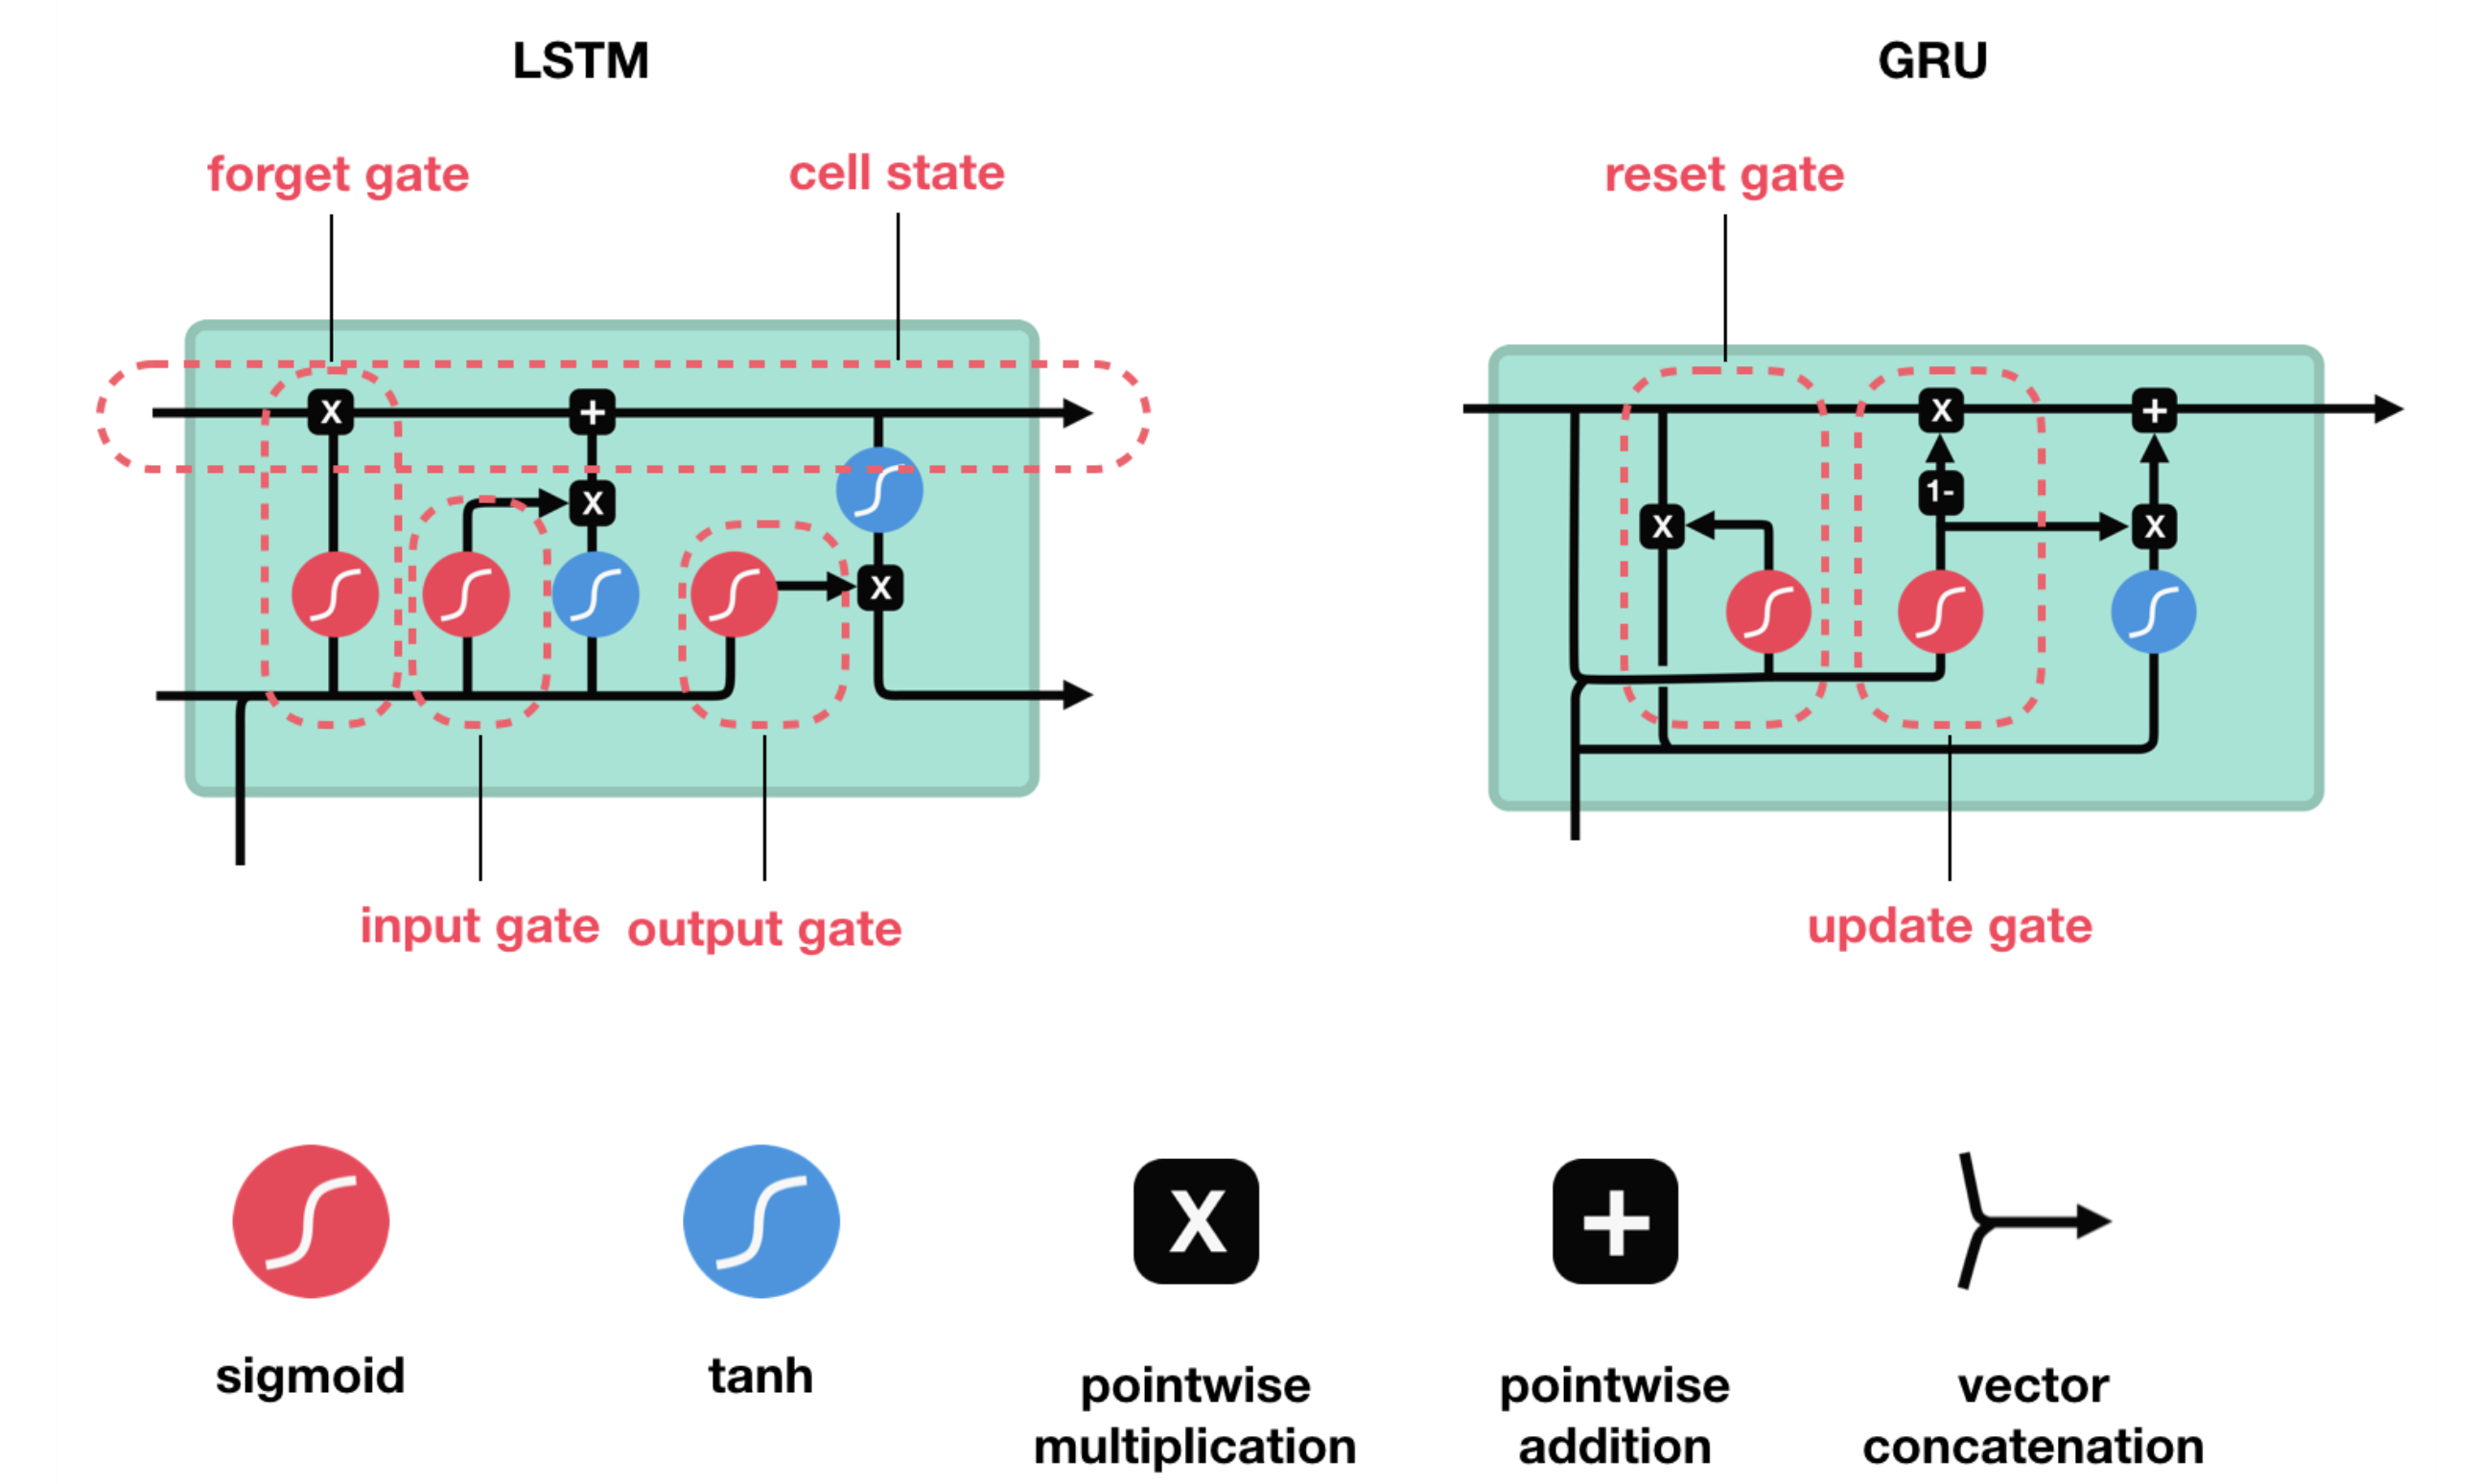

These **gates** can **learn** which data in a sequence is **important to keep** or **throw away.**

LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

When you read the review, your brain subconsciously only remembers important keywords. You pick up words like “amazing” and “perfectly balanced breakfast”. You don’t care much for words like “this”, “gave“, “all”, “should”, etc. 

> And that is essentially what an LSTM or GRU does. It can **learn to keep only relevant information to make predictions**, and forget non relevant data. In this case, the words you remembered made you judge that it was good.

### Review of Recurrent Neural Networks

* **Then the RNN processes the sequence of vectors one by one.**

<img src='rnn.gif' />

While processing, it passes the previous hidden state to the next step of the sequence. The hidden state acts as the neural networks memory. It holds information on previous data the network has seen before.

<img src='rnn1.gif' />

Let’s look at a cell of the RNN to see how you would calculate the hidden state. First, the input and previous hidden state are combined to form a vector. That vector now has information on the current input and previous inputs. The vector goes through the tanh activation, and the output is the new hidden state, or the memory of the network.

<img src='rnn2.gif' />

### Tanh activation

The tanh activation is used to help regulate the values flowing through the network. The tanh function squishes values to always be between -1 and 1.

<img src='rnn3.gif' width=700/>

When vectors are flowing through a neural network, it undergoes many transformations due to various math operations. So imagine a value that continues to be multiplied by let’s say 3. You can see how some values can explode and become astronomical, causing other values to seem insignificant.

<img src='rnn4.gif' width=1000/>

So that’s an RNN. It has very few operations internally but works pretty well given the right circumstances (like short sequences). RNN’s uses a lot less computational resources than it’s evolved variants, LSTM’s and GRU’s.

# LSTM

An LSTM has a similar control flow as a recurrent neural network. It processes data passing on information as it propagates forward. The differences are the operations within the LSTM’s cells.

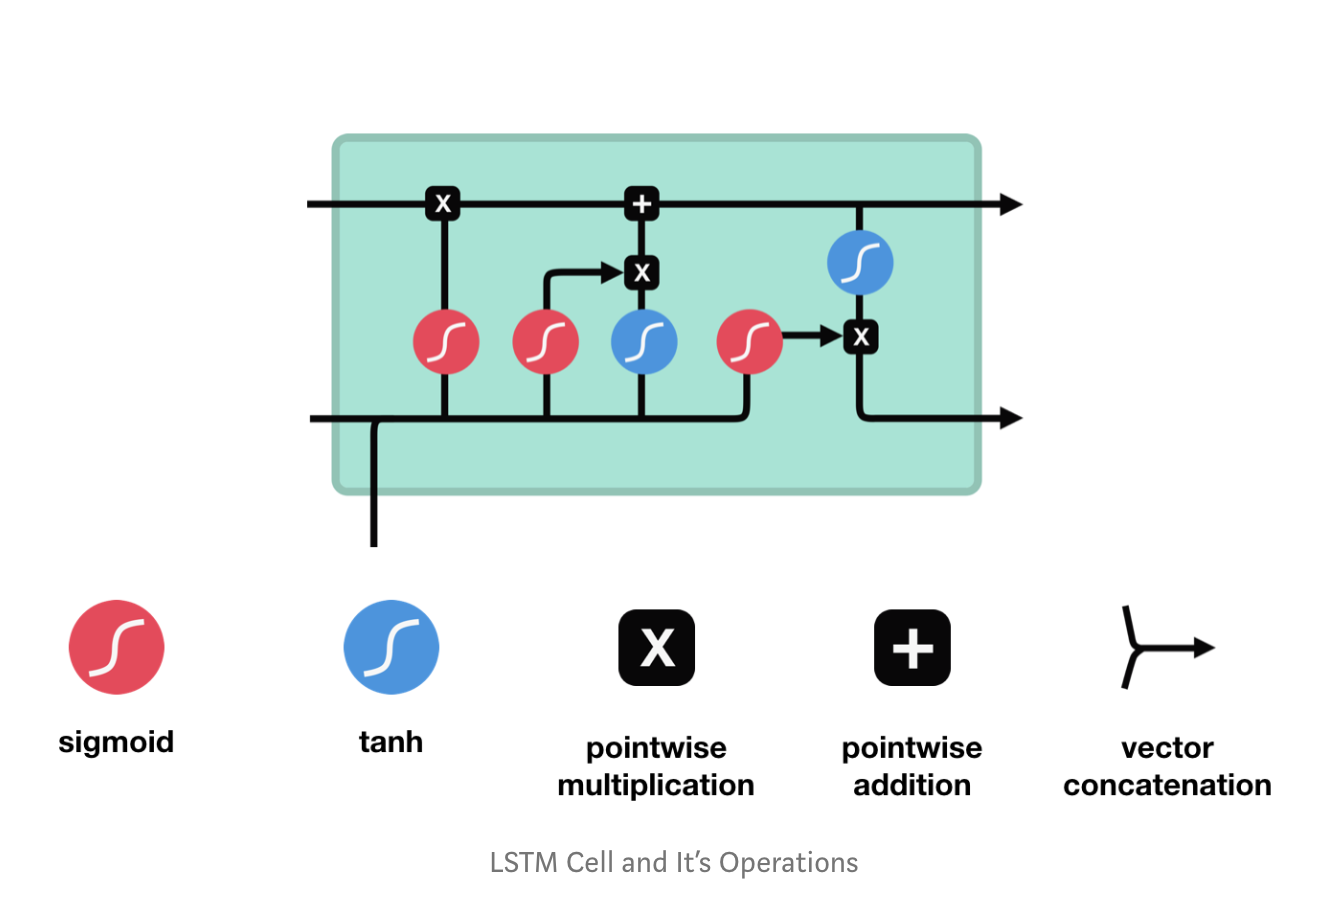

These operations are used to allow the LSTM to keep or forget information. Now looking at these operations can get a little overwhelming so we’ll go over this step by step.

## Core Concept

1. The core concept of LSTM’s are the cell state, and it’s various gates. 

2. The cell state act as a transport highway that transfers relative information all the way down the sequence chain. You can think of it as the “memory” of the network. 

3. The cell state, in theory, can carry relevant information throughout the processing of the sequence. 

4. So even information from the earlier time steps can make it’s way to later time steps, reducing the effects of short-term memory. 

5. As the cell state goes on its journey, information get’s added or removed to the cell state via gates. 

6. The gates are different neural networks that decide which information is allowed on the cell state. 

7. The gates can learn what information is relevant to keep or forget during training.

## Sigmoid
Gates contains sigmoid activations. A sigmoid activation is similar to the tanh activation. Instead of squishing values between -1 and 1, it squishes values between 0 and 1. That is helpful to update or forget data because any number getting multiplied by 0 is 0, causing values to disappears or be “forgotten.” Any number multiplied by 1 is the same value therefore that value stay’s the same or is “kept.” The network can learn which data is not important therefore can be forgotten or which data is important to keep.

<img src='rnn5.gif' width=1000/>

Let’s dig a little deeper into what the various gates are doing

So we have **three different gates** that regulate information flow in an LSTM cell. A **forget** gate, **input** gate, and **output** gate.

## Forget gate

> **This gate decides what information should be thrown away or kept.**

Information from the **previous hidden state** and information from the **current input** is **passed through** the **sigmoid** function. 

Values come out between 0 and 1. The **closer to 0** means to **forget**, and the **closer to 1** means to **keep**.


<img src='rnn6.gif' width=1000/>

## Input Gate
To update the cell state, we have the input gate. 

1. First, we pass the previous hidden state and current input into a sigmoid function. That decides which values will be updated by transforming the values to be between 0 and 1. 0 means not important, and 1 means important. 
3. You also pass the hidden state and current input into the tanh function to squish values between -1 and 1 to help regulate the network. Then you multiply the tanh output with the sigmoid output. 
>The sigmoid output will decide which information is important to keep from the tanh output.

<img src='rnn7.gif' width=900/>

## Cell State

1. First, the cell state gets **pointwise multiplied** by the forget vector. This has a **possibility of dropping values** in the cell state if it gets multiplied by values near 0. 
2. Then we take the output from the **input gate** and do a **pointwise addition** which **updates the cell state to new values** that the neural network finds relevant. That gives us our new cell state.

<img src='rnn8.gif' width=900/>

## Output Gate

The output gate **decides** what the **next hidden state should be**. 

Remember that the hidden state contains information on previous inputs. The hidden state is also used for predictions. 

1. First, we pass the **previous hidden state** and the **current input** into a **sigmoid function**. 
2. Then we pass the **newly modified cell state** to the **tanh function**. 
3. We **multiply** the **tanh output** with the **sigmoid output** to **decide what information** the **hidden state should carry**. 
The output is the hidden state. The new cell state and the new hidden is then carried over to the next time step.

<img src='rnn9.gif' width=900/>

[ref](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)